<a href="https://colab.research.google.com/github/KRANCHejb-01-2827/Crunchplp/blob/main/MLparadigms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

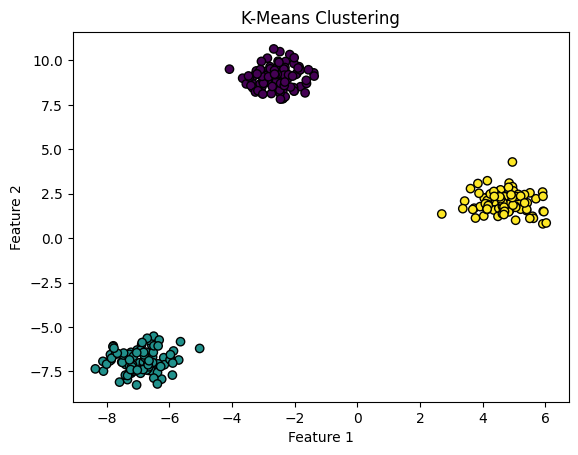

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [9]:
import gymnasium as gym
import numpy as np

# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False)

# Initialize Q-table
Q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
n_episodes = 2000
max_steps = 100
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

# Training phase
for episode in range(n_episodes):
    state, _ = env.reset()
    done = False

    for step in range(max_steps):
        exp_exp_tradeoff = np.random.uniform(0, 1)

        # Epsilon-greedy policy
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q_table[state, :])
        else:
            action = env.action_space.sample()

        # ✅ Gymnasium returns 5 values (note terminated + truncated)
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Q-learning update rule
        Q_table[state, action] = Q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(Q_table[new_state, :]) - Q_table[state, action]
        )

        state = new_state
        if done:
            break

    # ✅ decay_rate fixed spelling
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

# Print the final Q-table
print("Trained Q-table:")
print(Q_table)

# Testing phase
state, _ = env.reset()
total_reward = 0

for step in range(max_steps):
    action = np.argmax(Q_table[state, :])
    new_state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    state = new_state
    if terminated or truncated:
        break

print("Total reward earned during test:", total_reward)




Trained Q-table:
[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77375678]
 [0.77034753 0.857375   0.48611312 0.80988409]
 [0.76754702 0.         0.         0.48611312]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.80455601]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.85737497 0.95       0.         0.85737386]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]
Total reward earned during test: 1


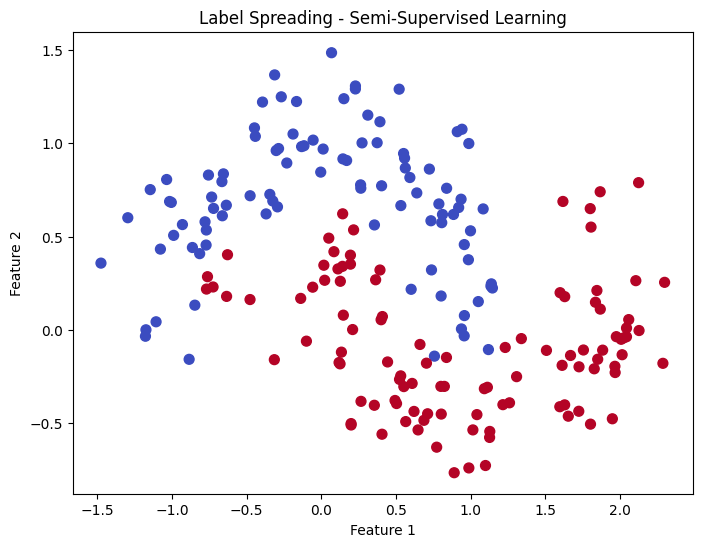

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       100
           1       0.92      0.97      0.95       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



In [2]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1️⃣ Generate a synthetic dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# 2️⃣ Simulate a partially labeled dataset (70% unlabeled)
rng = np.random.RandomState(42)
y_train = np.copy(y)
y_train[rng.rand(len(y)) < 0.7] = -1  # -1 denotes unlabeled samples

# 3️⃣ Initialize and fit the Label Spreading model
label_spread = LabelSpreading(kernel="rbf", gamma=20, max_iter=30)
label_spread.fit(X, y_train)

# 4️⃣ Predict labels for all data points
y_pred = label_spread.transduction_

# 5️⃣ Visualize the propagated labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=50)
plt.title("Label Spreading - Semi-Supervised Learning")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 6️⃣ Evaluate performance
print(classification_report(y, y_pred))
